**importing the important libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/Zomato-data-.csv')

# #checking the **dataset**

In [3]:
df.head(3)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet


checking the null **values** in dataset

In [4]:
df.isnull().sum()

,0
name,0
online_order,0
book_table,0
rate,0
votes,0
approx_cost(for two people),0
listed_in(type),0


checking the duplicate value

In [7]:
df.duplicated().sum()

np.int64(0)

**info about the dataset**

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


**describe** the dataset

In [8]:
df.describe()

,votes,approx_cost(for two people)
count,148.000000,148.000000
mean,264.810811,418.243243
std,653.676951,223.085098
min,0.000000,100.000000
25%,6.750000,200.000000
50%,43.500000,400.000000
75%,221.750000,600.000000
max,4884.000000,950.000000


In [17]:
def handle(value):
  value=str(value).split('/')
  value=value[0]
  return float(value)

In [19]:
df['rate']=df['rate'].apply(handle)

In [20]:
df.head(2)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet


Checking the Most resturant **category**

Text(0.5, 0, 'type of restaurant')

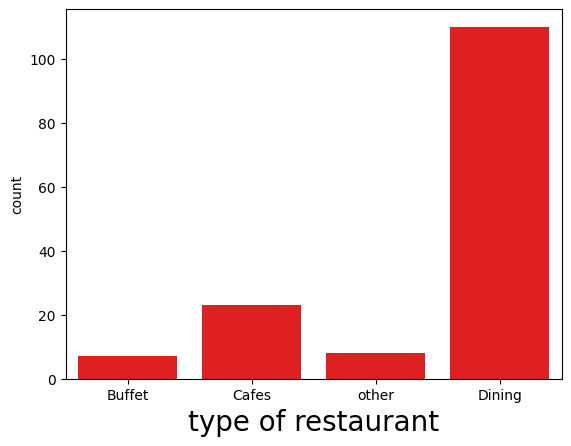

In [46]:
sns.countplot(x=df['listed_in(type)'],color='r')
plt.xlabel('type of restaurant',color='black',size=20)

##**Conclusion**
# Majority of restaurants fall is **dining category**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

###**Problem**
**how many votes has each type of restaurant recieved from customer**

Text(0, 0.5, 'Votes')

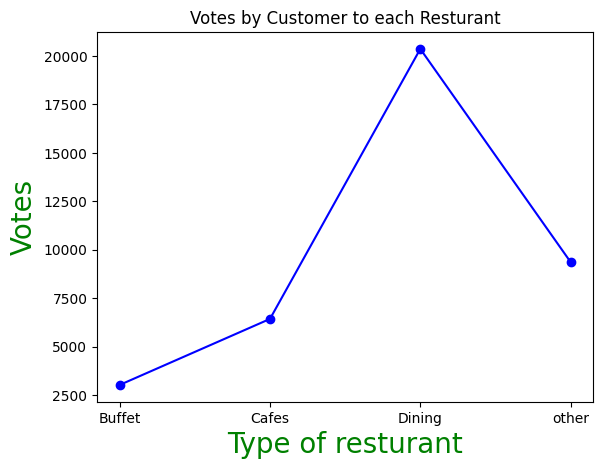

In [62]:
groupdata=df.groupby('listed_in(type)')['votes'].sum()
res=pd.DataFrame({'vote':groupdata})
plt.plot(res,color='b',marker='o')
plt.title('Votes by Customer to each Resturant')
plt.xlabel('Type of resturant',c='g',size=20)
plt.ylabel('Votes',c='g',size=20)

#**Conclusion**
**Dining** get the most votes

##**Problem**
## **what are the rating that majority of restuants have recieved**

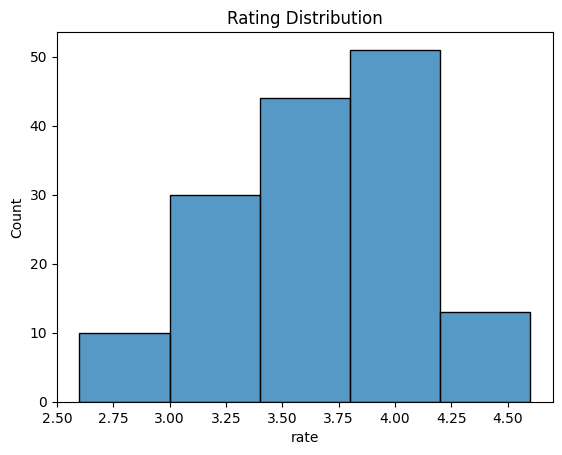

In [71]:
sns.histplot(df['rate'],bins=5)
plt.title('Rating Distribution')
plt.show()

#**Conclusion**
# Majority resturants recieve rating from **3.5 to 4**

#**problem**
**Average order spending by couples**

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

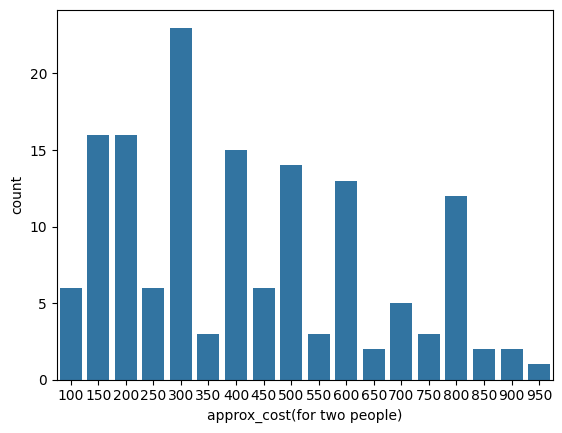

In [75]:
sns.countplot(x=df['approx_cost(for two people)'])

#**Conclusion**
# Majority of couples prefer the approx cost of **300** rupees

**#Problem**

** Which Mode recieve the most rating**

<Axes: xlabel='online_order', ylabel='rate'>

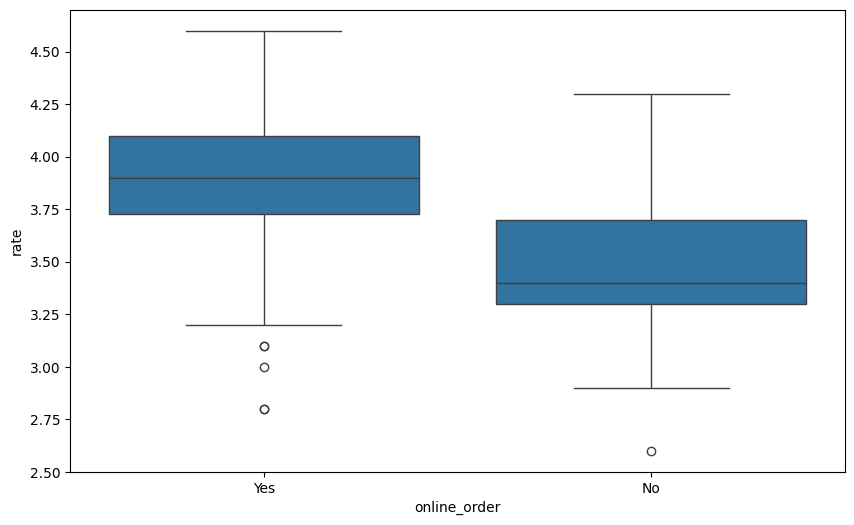

In [79]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['online_order'],y=df['rate'])

**##Conclusion**

# **online** Order recieve the most rating

#**problem**
**Which resturant recieve the most offline orders bold text**

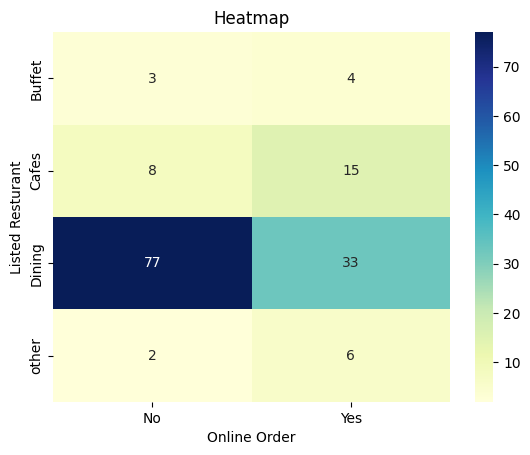

In [84]:
pivot_table=df.pivot_table(index='listed_in(type)',columns='online_order', aggfunc='size',fill_value=0)
sns.heatmap(pivot_table,annot=True,cmap='YlGnBu',fmt='d')
plt.title('Heatmap')
plt.xlabel('Online Order')
plt.ylabel('Listed Resturant')
plt.show()

**#Conclusion**

**Dining** resturant get the most online and offline order